### Text Mining Homework 2

#### 1. IMDB Top 250 movies

(https://www.imdb.com/search/title/?groups=top_250&sort=user_rating)

We want to analyze IMDB top 250 movies. Create a data frame containing the five variables below while doing necessary preprocessing, such as removing dots or parentheses, and then answer the question. (rank, title, year, runtime, genre, director, rating (the number next to the yellow star))

In [2]:
import requests
from bs4 import BeautifulSoup
import re

url1 = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&ref_=adv_prv'
url2 = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt'
url3 = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt'
url4 = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt'
url5 = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt'
url_list = [url1, url2, url3, url4, url5]

rank_list = []
title_list = []
year_list = []
runtime_list = []
genre_list = []
director_list = []
rating_list = []

for url_i in url_list:
  url = url_i
  req = requests.get(url)
  html = req.text
  soup = BeautifulSoup(html, "html.parser")

  for i in range(0,50):
    rank = re.sub('\.', '', soup.select(".lister-item-index")[i].text)
    title = soup.select(".lister-item-header > a")[i].text
    year = re.sub('\(|\)', '', soup.select(".lister-item-year")[i].text)
    runtime = float(re.sub('min', ' ', soup.select(".runtime")[i].text))
    genre = re.sub('\\n', '', soup.select(".genre")[i].text)
    director = soup.select("p > a:nth-of-type(1)")[i].text
    rating = float(soup.select(".inline-block > strong")[i].text)
    rank_list.append(rank)
    title_list.append(title)
    year_list.append(year)
    runtime_list.append(runtime)
    genre_list.append(genre)
    director_list.append(director)
    rating_list.append(rating)
    # print(i)

1.1 What are the top 2 years with the highest frequency?

In [3]:
from collections import Counter
year_clean = [i.replace('I ','') for i in year_list]
counter = Counter(year_clean)
most_common_2 = counter.most_common(2)

print(most_common_2)

[('1995', 8), ('2004', 7)]


1995, 2004 are the highest frequent year.

1.2 Using the average of ratings by year, find the **year with the highest** average value and **the average value**

In [5]:
import pandas as pd
df = pd.DataFrame([title_list, rank_list, runtime_list, genre_list, director_list, rating_list], 
                   index = ['title','rank','runtime','genre','director','rating'], 
                   columns = year_clean).T
df

,title,rank,runtime,genre,director,rating
1994,쇼생크 탈출,1,142.0,Drama,Frank Darabont,9.3
1972,Daeboo,2,175.0,"Crime, Drama",Francis Ford Coppola,9.2
2008,다크 나이트,3,152.0,"Action, Crime, Drama",Christopher Nolan,9.0
1993,쉰들러 리스트,4,195.0,"Biography, Drama, History",Oskar Schindler,9.0
2003,반지의 제왕: 왕의 귀환,5,201.0,"Action, Adventure, Drama",Steven Spielberg,9.0
...,...,...,...,...,...,...
1925,The Gold Rush,246,95.0,"Adventure, Comedy, Drama",Yasujirô Ozu,8.1
2004,The Incredibles,247,115.0,"Animation, Action, Adventure",Carl Theodor Dreyer,8.0
1992,알라딘,248,90.0,"Animation, Adventure, Comedy",Frank Capra,8.0
1993,사랑의 블랙홀,249,101.0,"Comedy, Drama, Fantasy",Clyde Bruckman,8.0


In [6]:
df['rating'].groupby(df.index).mean().sort_values(ascending = False).iloc[:1]

1972    9.2
Name: rating, dtype: object

The year which have the highest average rating is **1972** whose value is 9.2

1.3 What is the second most frequent genre and how many episodes are there? (Note: Multiple genre combinations are classified as one separate genre )

In [7]:
df.groupby('genre')['genre'].value_counts().sort_values(ascending = False)

genre
Drama                                       19
Crime, Drama                                14
Animation, Adventure, Comedy                 9
Crime, Drama, Mystery                        9
Biography, Drama, History                    9
                                            ..
Crime, Drama, Film-Noir                      1
Adventure, Comedy, Sci-Fi                    1
Adventure, Comedy, Fantasy                   1
Crime, Mystery, Thriller                     1
Western                                      1
Name: count, Length: 105, dtype: int64

In [8]:
df.groupby('genre')['genre'].value_counts().sort_values(ascending = False).iloc[1:2]

genre
Crime, Drama                14
Name: count, dtype: int64

The second most frequent genre is **Crime, Drama** whose number of episode are 14

장르를 만약 나누라면?

In [21]:
import numpy as np
sep_genre_count = []
for i in np.array(df['genre']) :
    sep_genre_count.append(i.split(', '))

In [23]:
for i in sep_genre_count :
    for j in range(len(i)) :
        i[j] = i[j].replace(' ','')

In [27]:
save_genre = []
for i in sep_genre_count :
    for j in i :
        save_genre.append(j)

In [28]:
pd.Series(save_genre).value_counts()

Drama        176
Adventure     59
Action        52
Crime         52
Comedy        46
Mystery       32
Thriller      32
Biography     28
War           24
Animation     24
Romance       23
Sci-Fi        20
Fantasy       14
Family        13
History       10
Western        6
Horror         5
Sport          5
Music          4
Film-Noir      4
Musical        1
Name: count, dtype: int64

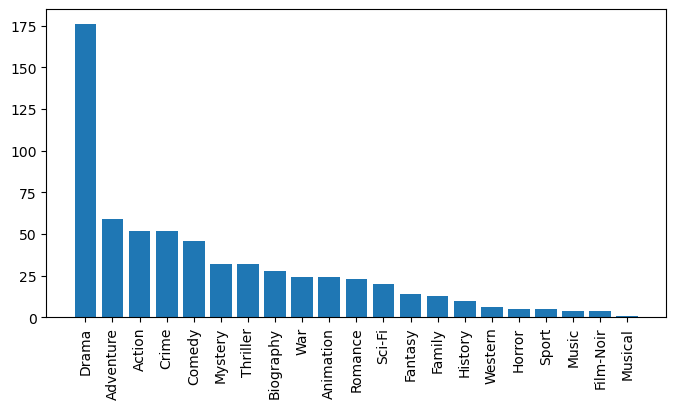

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 4))
plt.bar(pd.Series(save_genre).value_counts().index, pd.Series(save_genre).value_counts())
plt.xticks(rotation = 90)
plt.show()

모두 분리해서 counting하면 Drama가 176번으로 가장 많다

1.4 Who is(are) the director(s) who produced more than 7 films?

In [33]:
df.groupby('director')['director'].value_counts().sort_values(ascending = False) > 7

director
Christopher Nolan         True
Martin Scorsese          False
Steven Spielberg         False
Akira Kurosawa           False
Alfred Hitchcock         False
                         ...  
Henry Hill               False
Henri-Georges Clouzot    False
Gus Van Sant             False
Guillermo del Toro       False
어벤져스: 인피니티 워             False
Name: count, Length: 159, dtype: bool

The director who produced more than 7 films is **Christopher Nolan**

1.5 How many works are there less than 70 minutes in their runtime?

In [34]:
df['runtime'] = df['runtime'].astype(float)

In [35]:
df[df['runtime'] < 70]

,title,rank,runtime,genre,director,rating
1921,The Kid,169,68.0,"Comedy, Drama, Family",Charles Chaplin,8.2
1924,Sherlock Jr.,172,45.0,"Action, Comedy, Romance",Buster Keaton,8.2


There is only 2 works whose running time is less than 70 minutes

#### Problem 2

We want to extract the news from August 15th to 18th, 2023 from the oilprice.com site and list [title] and [writer]. After extracting the title and date of the news using the URL pages below (20 cases per page) as candidates, we are trying to separately extract cases where the corresponding date falls between August 15 and 18, 2023.

https://oilprice.com/Latest-Energy-News/World-News/
https://oilprice.com/Latest-Energy-News/World-News/Page-1.html
https://oilprice.com/Latest-Energy-News/World-News/Page-2.html

Note that each of the above URL pages contains 20 news articles.
Answer the questions below about the news from August 15-18, 2023.

In [39]:
url_list = [
    "https://oilprice.com/Latest-Energy-News/World-News/Page-24.html",
    "https://oilprice.com/Latest-Energy-News/World-News/Page-25.html",
    "https://oilprice.com/Latest-Energy-News/World-News/Page-26.html"
]

In [40]:
news_titles = []
news_date = []
news_writer = []
news_excerpt = []

for url in url_list:
    req = requests.get(url)
    html = req.text
    soup = BeautifulSoup(html, "html.parser")
    
    title_elements = soup.select(".categoryArticle__title")
    meta_elements = soup.select(".categoryArticle__meta")
    excerpt_elements = soup.select('.categoryArticle__excerpt')
    
    for title_element in title_elements:
        title = title_element.text.strip()
        news_titles.append(title)
        
    for meta_element in meta_elements :
        time, writer = meta_element.text.strip().split(' | ')
        date, _ = time.split(' at ')
        news_writer.append(writer)
        news_date.append(date)
    
    for excerpt_element in excerpt_elements :
        excerpt = excerpt_element.text.strip()
        news_excerpt.append(excerpt)

In [41]:
news = pd.DataFrame([news_titles, news_writer, news_excerpt], 
                    columns = news_date, 
                    index = ['title','writer','excerpt']).T
news

,title,writer,excerpt
"Aug 21, 2023",Latest U.S. Upstream Merger To Create $14-Bill...,Charles Kennedy,Permian Resources has signed a deal to buy Ear...
"Aug 21, 2023",U.S. Oil Firm Apache Plans To Invest $1.4 Bill...,Charles Kennedy,Apache Corporation plans to invest next year $...
"Aug 21, 2023",North Carolina Excluded From Offshore Wind Lea...,Tsvetana Paraskova,The Biden Administration has not included area...
"Aug 21, 2023",Saudi Arabia Secures Financing For $2.4 Billio...,Tsvetana Paraskova,"Several Saudi firms, including oil giant Aramc..."
"Aug 21, 2023",The Impact Of Looming Strikes At Australian LN...,Tsvetana Paraskova,A prolonged stoppage is the least likely scena...
"Aug 21, 2023",China Emerges As A Global LNG Trading Power,Charles Kennedy,China is expanding its presence in the global ...
"Aug 21, 2023",Alberta Halts New Wind And Solar Projects As R...,Irina Slav,"Alberta, Canada’s oil heartland, this month in..."
"Aug 21, 2023",Libya Unifies Central Bank After Nearly A Deca...,Charles Kennedy,Amid ongoing political instability caused by r...
"Aug 18, 2023",Big Solar Slapped With Tariffs For Dodging Chi...,Alex Kimani,The United Commerce Department will finalize a...
"Aug 18, 2023",Adani Clears Air On Rumored $2.5 Billion Deal ...,Alex Kimani,"Adani Transmission, a subsidiary of Indian con..."


select the data during 2023.08.15 - 2023.08.18

In [42]:
news_clean = news.loc[['Aug 15, 2023', 'Aug 16, 2023', 'Aug 17, 2023', 'Aug 18, 2023']]
news_clean

,title,writer,excerpt
"Aug 15, 2023",Oil Steady Despite Large Crude Draw,Julianne Geiger,Crude oil inventories in the United States saw...
"Aug 15, 2023",U.S. Shale Oil Production Growth Getting Incre...,Julianne Geiger,The average U.S. shale output per well may hav...
"Aug 15, 2023",U.S. Pipeline Gas Exports To Mexico Hit A Reco...,Tom Kool,The United States exported record-high volumes...
"Aug 15, 2023",Russia To Raise Oil Export Duty To Highest Thi...,Julianne Geiger,Russia’s Finance Ministry has set its oil expo...
"Aug 15, 2023",Premier Claims Alberta Will Never Comply With ...,Charles Kennedy,The oil and gas-rich province of Alberta will ...
"Aug 15, 2023",Libya’s Oil Output Threatened As Intense Fight...,Tsvetana Paraskova,Libya saw overnight its worst clashes in the c...
"Aug 15, 2023",Robotaxis Clog Streets Of San Francisco In Maj...,ZeroHedge,Turns out that driverless robotaxis still may ...
"Aug 15, 2023",APA In Talks About Floating LNG Site Offshore ...,Tsvetana Paraskova,"APA Corp, which has made several oil discoveri..."
"Aug 15, 2023",Deadly Explosions Rock Russian Oilfield,Tsvetana Paraskova,Two people died and seven others were injured ...
"Aug 15, 2023",Australia To Consider Tariffs On Carbon-Intens...,Tsvetana Paraskova,Australia will launch a review into whether to...


2.1 How many news articles were there for 4 days?

In [43]:
print(f'There has {len(news_clean)} articles for 4 days')

There has 45 articles for 4 days


2.2 List all news titles for 4 days

In [44]:
news_clean['title'].values

array(['Oil Steady Despite Large Crude Draw',
       'U.S. Shale Oil Production Growth Getting Increasingly Difficult: Report',
       'U.S. Pipeline Gas Exports To Mexico Hit A Record-High',
       'Russia To Raise Oil Export Duty To Highest This Year',
       'Premier Claims Alberta Will Never Comply With Canada’s Clean Power Proposal',
       'Libya’s Oil Output Threatened As Intense Fighting Breaks Out In Tripoli',
       'Robotaxis Clog Streets Of San Francisco In Major Traffic Jam',
       'APA In Talks About Floating LNG Site Offshore Guyana-Suriname',
       'Deadly Explosions Rock Russian Oilfield',
       'Australia To Consider Tariffs On Carbon-Intensive Imports',
       'Suncor Energy Reports A Substantial Decline In Profits',
       'EIA Sees Lower Shale Oil Production In September',
       'India Approves $7B Electric City Bus Scheme',
       'Amid Energy Crisis, Lebanon Sees First DrillShip Arrive For Oil Exploration',
       'U.S. Gas Prices Hit Year High As Market Tigh

2.3 Who is the most frequent news reporter for 4 days?

In [45]:
most_freq_reporter = news_clean.groupby('writer')['writer'].value_counts().sort_values(ascending = False).iloc[:1]

In [46]:
print(f'The most frequent news reporter is {most_freq_reporter.index.values} who wrotes {most_freq_reporter.values} articles')

The most frequent news reporter is ['Tsvetana Paraskova'] who wrotes [12] articles


In [48]:
ex = []
for i in news_clean['excerpt'] :
    ex.append(i)

In [51]:
ex_text = ' '.join(ex)

preprocessing

In [52]:
import re
letters_only = re.sub('[^a-zA-Z]', ' ', ex_text)

소문자 변경

In [54]:
lower_latters = letters_only.lower().split() # list

불용어 제거

In [55]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
stops = set(stopwords.words('english')) # unique words

In [57]:
meaningful_words = [word for word in lower_latters if not word in stops]

단어 어근 추출

In [58]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemming_words = [ps.stem(word) for word in meaningful_words]

In [62]:
print(f'It can obtain {len(set(stemming_words))} words when duplicates are removed')

It can obtain 501 words when duplicates are removed


oil이 나온 횟수

In [63]:
print(f'{stemming_words.count("oil")} times are occurred in text')

20 times are occurred in text


In [64]:
from collections import Counter
third_word, freq = Counter(stemming_words).most_common(10)[2]
print(f'The third most frequent word is "{third_word}" and its frequency is {freq}')

The third most frequent word is "ga" and its frequency is 11


In [65]:
import matplotlib.pyplot as plt
freq_words = Counter(stemming_words).most_common(20)
keywords = [key[0] for key in freq_words]
freq = [freq[1] for freq in freq_words]

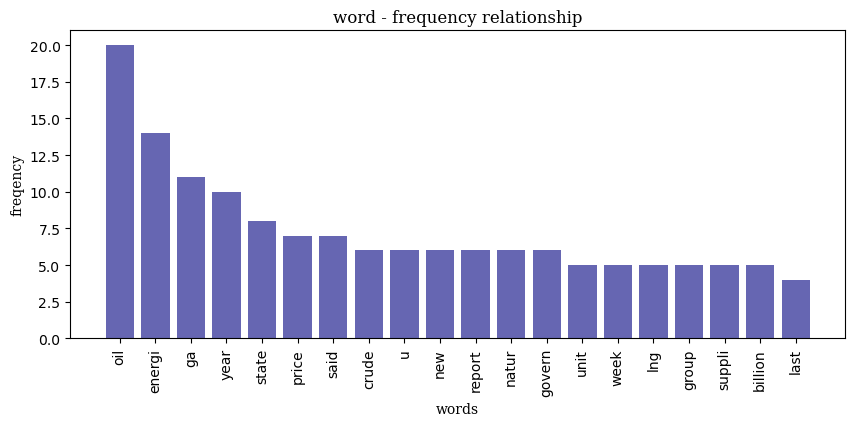

In [69]:
def plot_word_freq(keywords : list, freq : list) -> None :
    plt.figure(figsize = (10, 4))
    plt.bar(keywords, freq, color = 'navy', alpha = 0.6)
    plt.xlabel('words', fontfamily = 'Serif')
    plt.ylabel('freqency', fontfamily = 'Serif')
    plt.xticks(rotation = 90)
    plt.title('word - frequency relationship', fontsize = 12, fontfamily = 'Serif')
    plt.show()
    
def main() -> None : plot_word_freq(keywords, freq)

if __name__ == '__main__' : main();